In [ ]:
'''
# Lab | Customer Analysis Final Round

For this lab, we still keep using the `marketing_customer_analysis.csv` file that you can find in the `files_for_lab` folder.

It's time to put it all together. Remember the previous rounds and follow the steps as shown in previous lectures.

### 01 - Problem (case study)

- Data Description.
- Goal.

### 02 - Getting Data

- Read the `.csv` file.

### 03 - Cleaning/Wrangling/EDA

- Change headers names.
- Deal with NaN values.
- Categorical Features.
- Numerical Features.
- Exploration.

### 04 - Processing Data

- Dealing with outliers.
- Normalization.
- Encoding Categorical Data.
- Splitting into train set and test set.

### 05 - Modeling

- Apply model.

### 06 - Model Validation

- R2.
- MSE.
- RMSE.
- MAE.

### 07 - Reporting

- Present results.'''

In [220]:
import pandas as pd

import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [221]:
# Read the `.csv` file.

In [222]:
df = pd.read_csv(r"C:\Users\filip\OneDrive\Desktop\IRONHACK\Labs\Week3\lab-customer-analysis-round-7\files_for_lab\csv_files\marketing_customer_analysis.csv", sep = ',')

In [223]:
# Change headers names

In [224]:
cols = []
for i in range(len(df.columns)):
    cols.append(df.columns[i].lower().replace(' ','_'))
    
df.columns = cols
df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [225]:
# Deal with NaN values.

In [226]:
df.isna()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9130,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9131,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9132,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [227]:
df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [228]:
#Categorical Features.
#Numerical Features.

In [229]:
data_types = df.dtypes
print (data_types)

def column_types (data):
    num_col = df.select_dtypes(include=['int', 'float']).columns
    cat_col = df.select_dtypes(include=['object']).columns
    return num_col, cat_col


numeric_columns, categorical_columns = column_types(df)
print ('numerical colums: ', numeric_columns)
print ('categorical colums: ', categorical_columns)

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
dtype: object
nu

In [230]:
#Exploration.

In [231]:
df.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [232]:
#Dealing with outliers

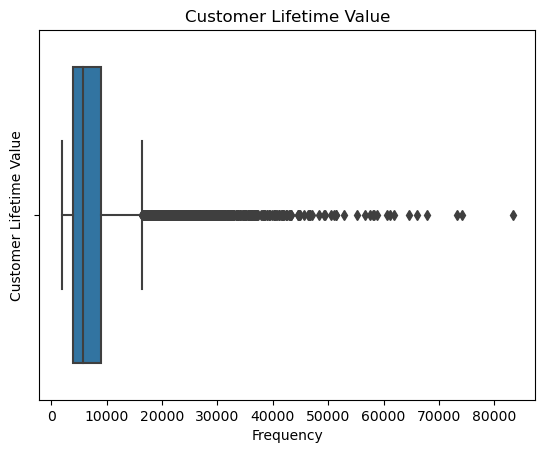

In [233]:
sns.boxplot(x=df['customer_lifetime_value'], data=df)
plt.title('Customer Lifetime Value')
plt.xlabel('Frequency')
plt.ylabel('Customer Lifetime Value')
plt.show()

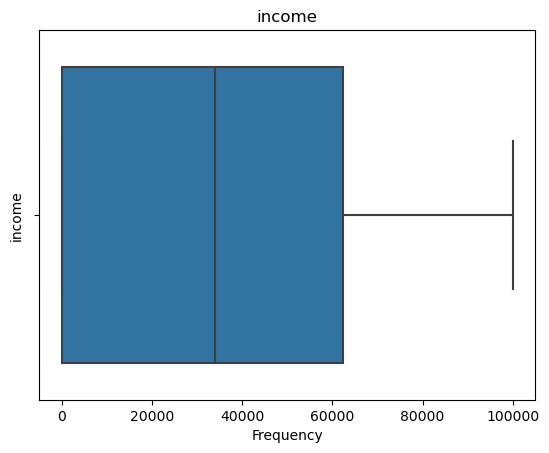

In [234]:
sns.boxplot(x=df['income'], data=df)
plt.title('income')
plt.xlabel('Frequency')
plt.ylabel('income')
plt.show()

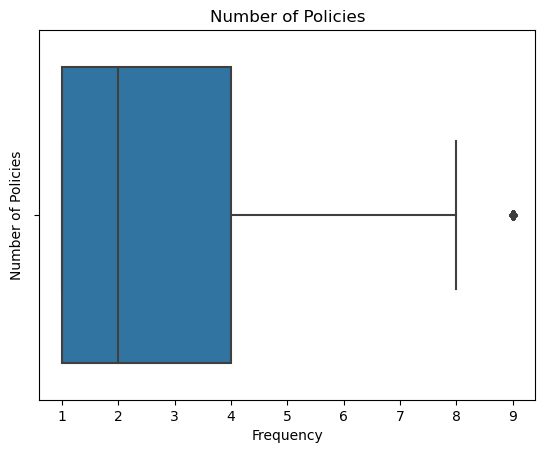

In [235]:
sns.boxplot(x=df['number_of_policies'], data=df)
plt.title('Number of Policies')
plt.xlabel('Frequency')
plt.ylabel('Number of Policies')
plt.show()

In [236]:
# Normalization, Encoding Categorical Data, Splitting into train set and test set.

In [237]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

df_train, df_test = train_test_split(df, test_size=0.2, random_state=11)

target_train = df_train[['total_claim_amount']]
target_train = target_train.reset_index(drop = True)

target_test = df_test[['total_claim_amount']]
target_test = target_test.reset_index(drop = True)

df_train = df_train[['income', 'monthly_premium_auto', 'response', 'education','marital_status','gender', 'customer_lifetime_value','vehicle_size']]

df_train = df_train.reset_index(drop = True)

df_test = df_test[['income', 'monthly_premium_auto', 'response', 'education','marital_status','gender', 'customer_lifetime_value','vehicle_size']]

df_test = df_test.reset_index(drop = True)

df_train_num = df_train.select_dtypes(exclude=['object'])
df_train_cat = df_train.select_dtypes(exclude=['integer', 'float'])

df_test_num = df_test.select_dtypes(exclude=['object'])
df_test_cat = df_test.select_dtypes(exclude=['integer', 'float'])

df_train_cat = pd.get_dummies(df_train_cat, drop_first=False)
df_test_cat = pd.get_dummies(df_test_cat, drop_first=False)

scaler = MinMaxScaler()
normalized_data_train = scaler.fit_transform(df_train_num)
normalized_data_train = pd.DataFrame(normalized_data_train, columns = df_train_num.columns)

scaler = MinMaxScaler()
normalized_data_test = scaler.fit_transform(df_test_num)
normalized_data_test = pd.DataFrame(df_test_num, columns = df_test_num.columns)


final_data_train = pd.concat([df_train_num,df_train_cat], axis = 1).reset_index(drop = True)
final_data_test = pd.concat([df_test_num,df_test_cat], axis = 1).reset_index(drop = True)



In [238]:
# Apply model.

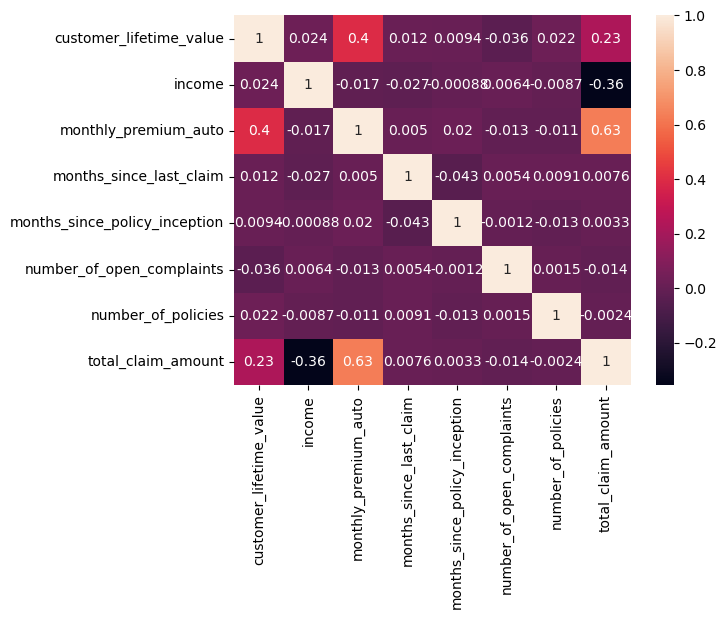

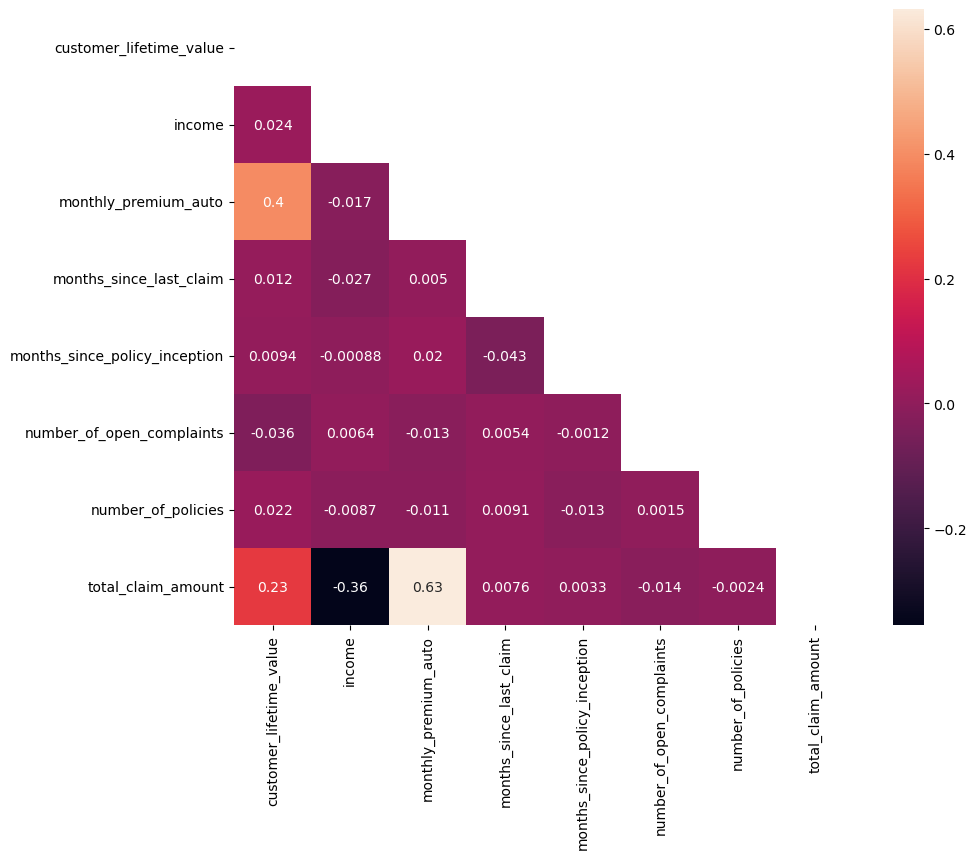

In [239]:
final_data_train_corr = df.corr()

sns.heatmap(final_data_train_corr, annot=True)
plt.show()
mask = np.zeros_like(final_data_train_corr)
mask[np.triu_indices_from(mask)] = True 
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(final_data_train_corr, mask=mask, annot=True)
plt.show()

In [240]:
Y = target_train
X = final_data_train

X = sm.add_constant(X)
model = sm.OLS(Y,X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     total_claim_amount   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     718.4
Date:                Tue, 17 Oct 2023   Prob (F-statistic):               0.00
Time:                        21:58:22   Log-Likelihood:                -48730.
No. Observations:                7307   AIC:                         9.749e+04
Df Residuals:                    7293   BIC:                         9.758e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             21.7440      2.796      7.776      0.000      16.262      27.226
income                            -0.0028   7.72e-05    -35.806      0.000      -0.003      -0.003
monthly_premium_auto               5.2237      0.071     73.978      0.000       5.085       5.362
customer_lifetime_value           -0.0002      0.000     -0.616      0.538      -0.001       0.000
response_No                        2.3707      3.118      0.760      0.447      -3.741       8.482
response_Yes                      19.3733      3.788      5.114      0.000      11.948      26.799
education_Bachelor                20.7613      4.387      4.733      0.000      12.162      29.361
education_College                 14.4715      4.433      3.265      0.001       5.782      23.161
education_Doctor                 -38.6026      9.777     -3.948      0.000     -57.768     -19.438
education_High School or Below    59.8031      4.481     13.346      0.000      51.019      68.587
education_Master                 -34.6894      6.968     -4.978      0.000     -48.350     -21.029
marital_status_Divorced          -16.2192      4.477     -3.623      0.000     -24.995      -7.444
marital_status_Married           -32.1309      3.232     -9.942      0.000     -38.466     -25.796
marital_status_Single             70.0941      3.815     18.372      0.000      62.615      77.573
gender_F                          -6.5524      2.635     -2.487      0.013     -11.717      -1.387
gender_M                          28.2963      2.639     10.721      0.000      23.122      33.470
vehicle_size_Large                -5.8663      5.283     -1.110      0.267     -16.223       4.491
vehicle_size_Medsize             -20.2456      3.313     -6.111      0.000     -26.740     -13.751
vehicle_size_Small                47.8559      4.304     11.118      0.000      39.418      56.294
==============================================================================
Omnibus:                      864.690   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6408.956
Skew:                           0.315   Prob(JB):                         0.00
Kurtosis:                       7.545   Cond. No.                     1.08e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.48e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [241]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

X_test = final_data_test
Y_test = target_test

Y = target_train
X = final_data_train

lm = linear_model.LinearRegression()
model = lm.fit(X,Y)
lm.score(X,Y)

predictions = lm.predict(X_test)

print("R2 value is = ",round(r2_score(Y_test, predictions),2))
print("The intercept of the model is = ",lm.intercept_)
print("The coefficients of the model are = ",lm.coef_)

mse = mean_squared_error(Y_test, predictions)
mae = mean_absolute_error(Y_test, predictions)
print("The mse of the model is = ",mse)
print("The root mse of the model is = ",np.sqrt(mse))
print("The mean absolute error of the model is = ",mae)

R2 value is =  0.58
The intercept of the model is =  [62.33270348]
The coefficients of the model are =  [[-2.76518055e-03  5.22370525e+00 -2.21810573e-04 -8.50132721e+00
   8.50132721e+00  1.64125566e+01  1.01227080e+01 -4.29513817e+01
   5.54543226e+01 -3.90382054e+01 -2.34672172e+01 -3.93788655e+01
   6.28460827e+01 -1.74243388e+01  1.74243388e+01 -1.31142430e+01
  -2.74936340e+01  4.06078770e+01]]
The mse of the model is =  38339.28129406867
The root mse of the model is =  195.80419120659462
The mean absolute error of the model is =  139.65151311110614


In [ ]:
# Present Results

In [ ]:
'''An R2 value of 0.58 suggests that 58% of the variance in the target variable is accounted for by the model. 
The model explains 58% of the variability in the data.'''

In [ ]:
'''MAE of approximately 139.65 indicates that, on average, the model's predictions are off by about 139.65 units from the actual values.'''